Files already downloaded and verified


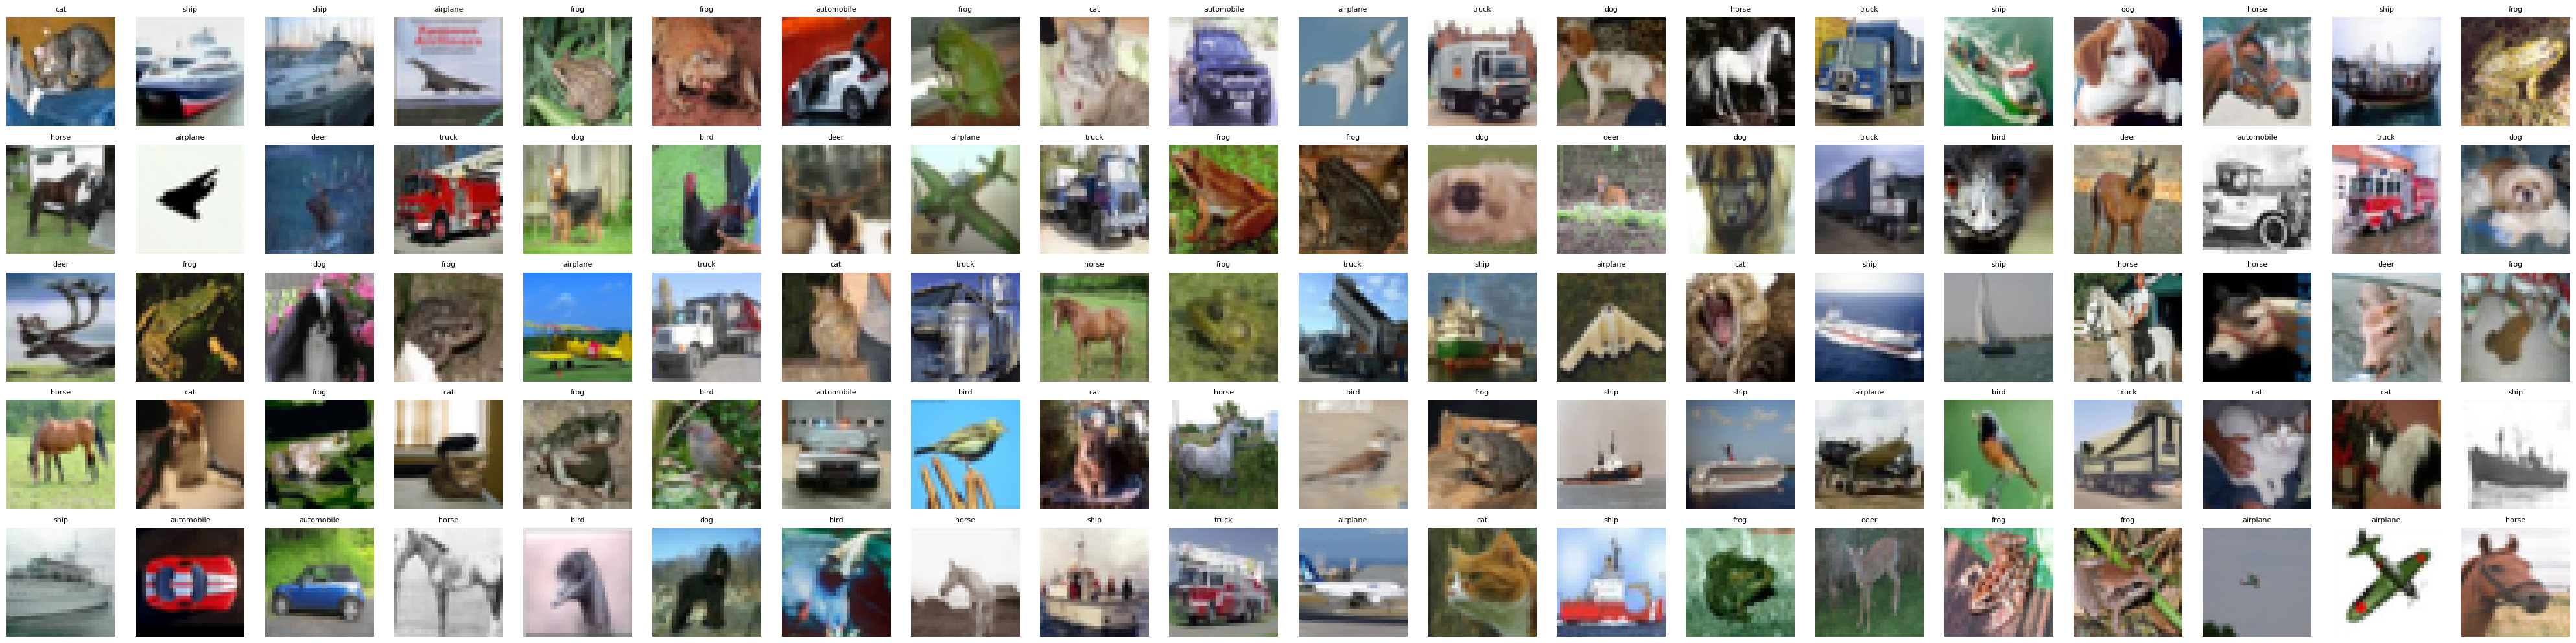

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
from torch.utils.data import DataLoader

# 数据预处理（将图像转换为张量）
transform = ToTensor()

# CIFAR-10 数据集
cifar10_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
data_loader = DataLoader(cifar10_dataset, batch_size=100, shuffle=False)

# CIFAR-10 数据集批量可视化
def visualize_cifar10_batch(data_loader, classes, batch_size=100):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # 获取一个批次数据
    images = images.permute(0, 2, 3, 1).numpy()  # 转换为 NumPy 格式 (N, H, W, C)

    # 创建网格显示
    grid_rows = batch_size // 20  # 一行显示20张
    grid_cols = 20
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 2, grid_rows * 2))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        img = images[i] * 255  # 还原像素值范围
        img = img.astype(np.uint8)  # 转为整型
        ax.imshow(img, interpolation='nearest')
        ax.set_title(classes[labels[i].item()], fontsize=8)  # 标签作为标题
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# 调用批量可视化函数
visualize_cifar10_batch(data_loader, cifar10_dataset.classes, batch_size=100)

Visualizing Features for Image 0, Label: cat


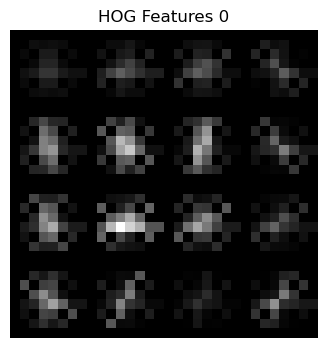

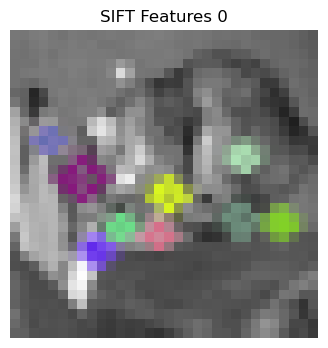

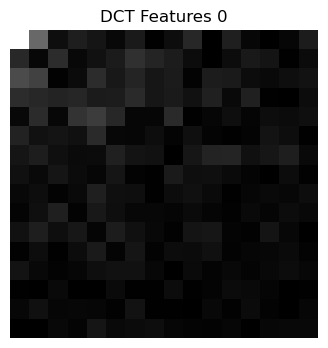

Visualizing Features for Image 1, Label: ship


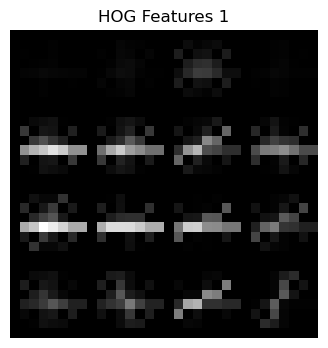

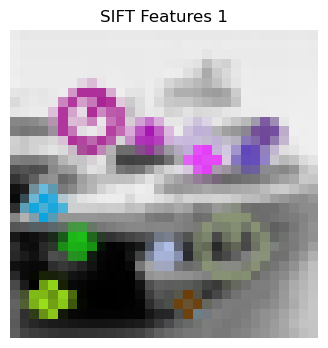

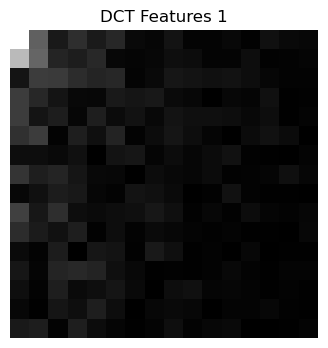

Visualizing Features for Image 2, Label: ship


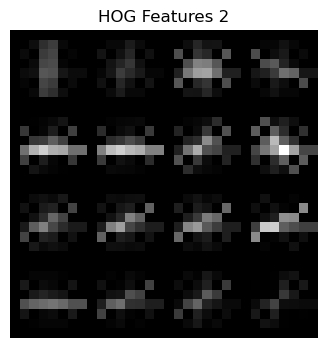

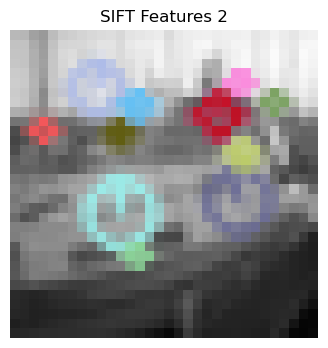

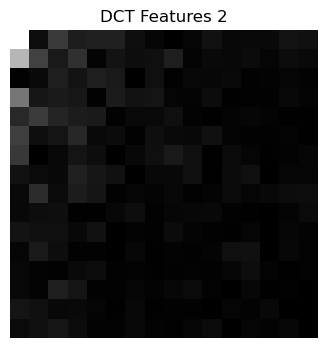

Visualizing Features for Image 3, Label: airplane


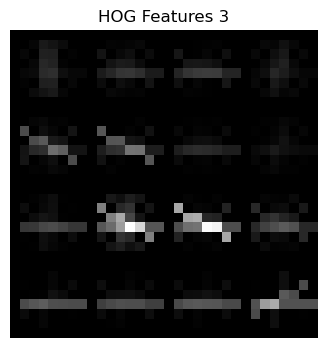

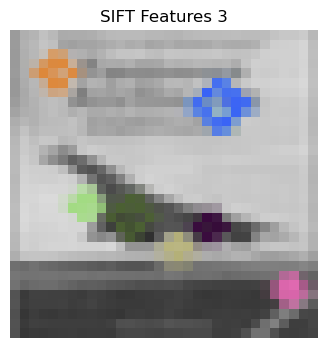

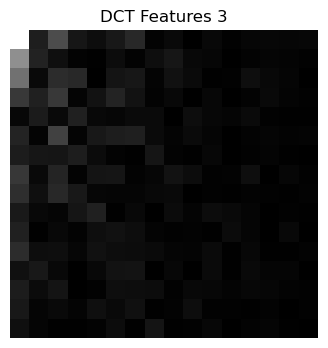

Visualizing Features for Image 4, Label: frog


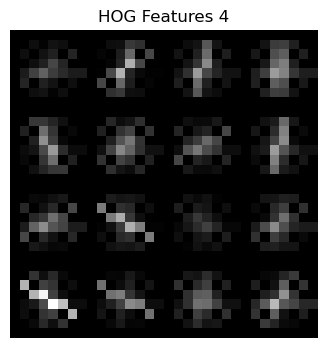

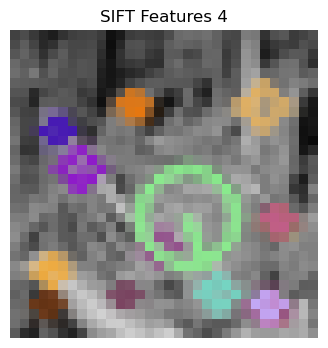

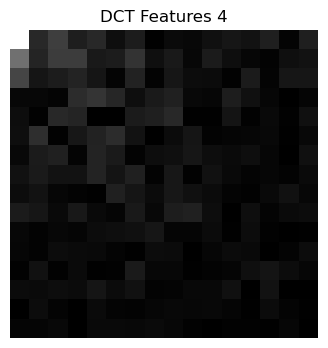

In [20]:

# HOG 特征提取与可视化
def extract_and_visualize_hog(img, index):
    img_np = (img * 255).astype(np.uint8)  # 转为 NumPy 格式
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    fd, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=None)
    plt.figure(figsize=(4, 4))
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"HOG Features {index}")
    plt.axis('off')
    plt.show()

# SIFT 特征提取与可视化
def extract_and_visualize_sift(img, index):
    img_np = (img * 255).astype(np.uint8)  # 转为 NumPy 格式
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(img_gray, None)
    img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_sift, cmap='gray')
    plt.title(f"SIFT Features {index}")
    plt.axis('off')
    plt.show()

# DCT 特征提取与可视化
def extract_and_visualize_dct(img, index):
    img_np = (img * 255).astype(np.uint8)  # 转为 NumPy 格式
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    dct = cv2.dct(np.float32(img_gray) / 255.0)  # 计算 DCT
    dct_low_freq = dct[:16, :16]  # 提取低频分量
    plt.figure(figsize=(4, 4))
    plt.imshow(np.log(abs(dct_low_freq) + 1), cmap='gray')  # 取对数增强对比度
    plt.title(f"DCT Features {index}")
    plt.axis('off')
    plt.show()

# 主程序
for idx, (img, label) in enumerate(data_loader):
    if idx == 0:  # 只处理第一个批次
        images = img.permute(0, 2, 3, 1).numpy()  # 转为 NumPy 格式 (N, H, W, C)
        for i in range(5):  # 对前 5 张图像进行特征提取
            print(f"Visualizing Features for Image {i}, Label: {cifar10_dataset.classes[label[i]]}")
            extract_and_visualize_hog(images[i], i)
            extract_and_visualize_sift(images[i], i)
            extract_and_visualize_dct(images[i], i)
        break

Files already downloaded and verified
Visualizing Features for Image 0, Label: cat


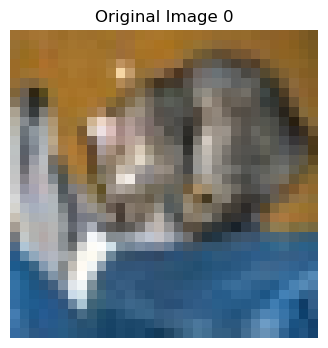

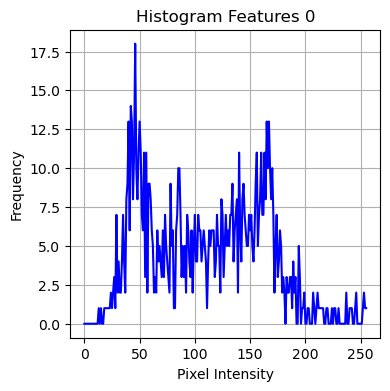

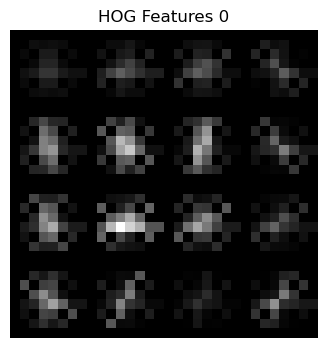

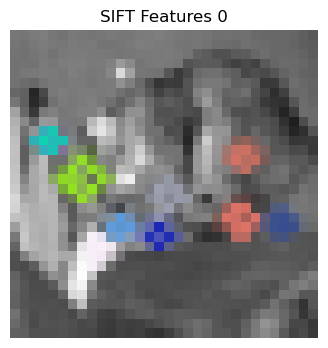

Visualizing Features for Image 1, Label: ship


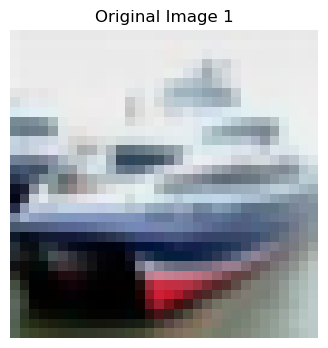

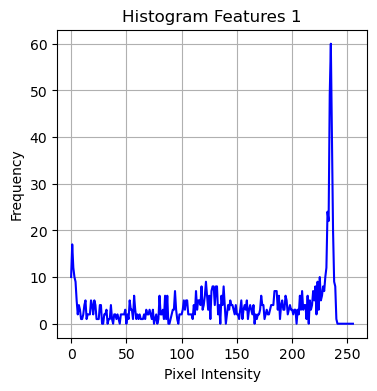

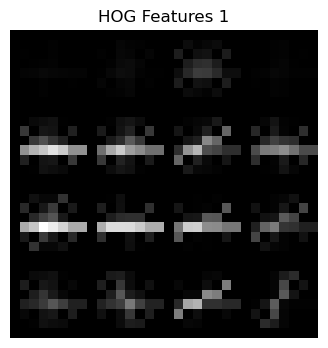

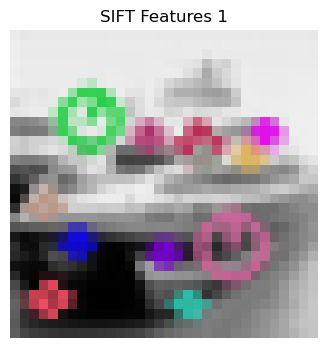

Visualizing Features for Image 2, Label: ship


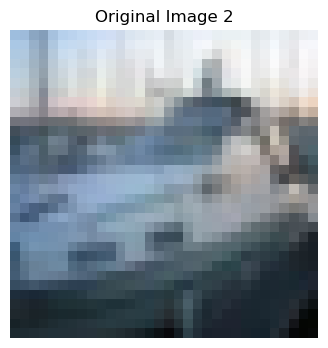

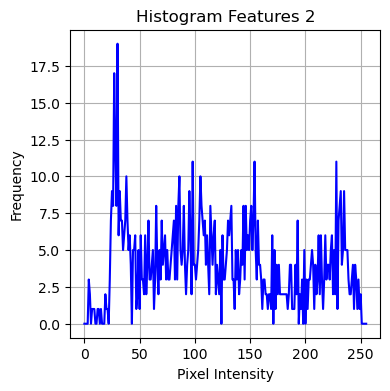

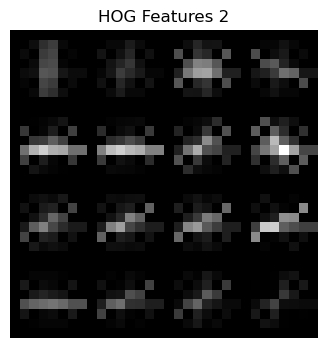

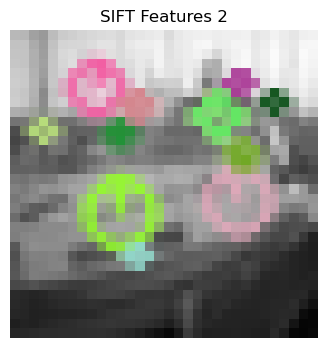

Visualizing Features for Image 3, Label: airplane


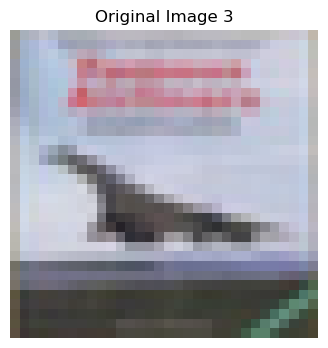

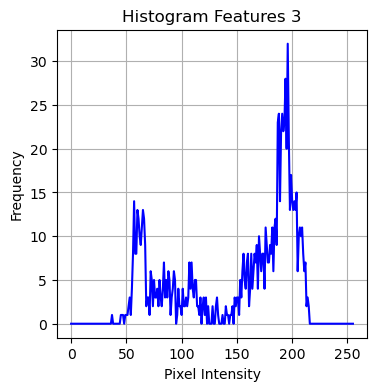

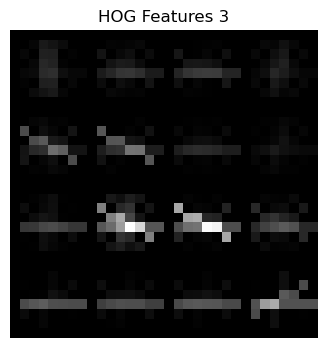

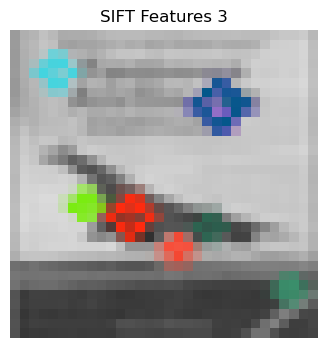

Visualizing Features for Image 4, Label: frog


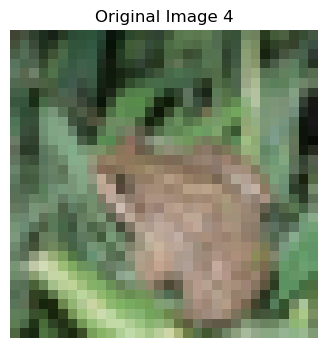

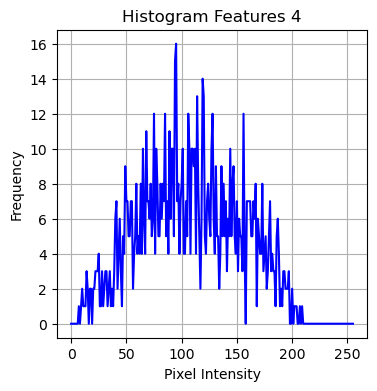

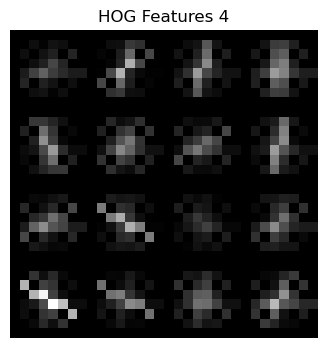

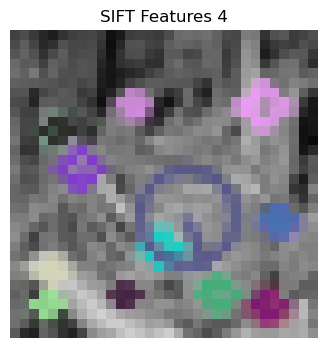

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
from torch.utils.data import DataLoader
from skimage.feature import hog

# 数据预处理（将图像转换为张量）
transform = ToTensor()

# CIFAR-10 数据集
cifar10_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
data_loader = DataLoader(cifar10_dataset, batch_size=100, shuffle=False)

# 显示原始图像
def visualize_original_image(img, index):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, interpolation='nearest')
    plt.title(f"Original Image {index}")
    plt.axis('off')
    plt.show()

# 直方图特征提取与可视化
def extract_and_visualize_histogram(img, index):
    img_np = (img * 255).astype(np.uint8)  # 转为 NumPy 格式
    hist = cv2.calcHist([img_np], [0], None, [256], [0, 256])  # 计算直方图
    plt.figure(figsize=(4, 4))
    plt.plot(hist, color='blue')
    plt.title(f"Histogram Features {index}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# HOG 特征提取与可视化
def extract_and_visualize_hog(img, index):
    img_np = (img * 255).astype(np.uint8)  # 转为 NumPy 格式
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    fd, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=None)
    plt.figure(figsize=(4, 4))
    plt.imshow(hog_image, cmap='gray')
    plt.title(f"HOG Features {index}")
    plt.axis('off')
    plt.show()

# SIFT 特征提取与可视化
def extract_and_visualize_sift(img, index):
    img_np = (img * 255).astype(np.uint8)  # 转为 NumPy 格式
    img_gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(img_gray, None)
    img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(4, 4))
    plt.imshow(img_sift, cmap='gray')
    plt.title(f"SIFT Features {index}")
    plt.axis('off')
    plt.show()

# 主程序
for idx, (img, label) in enumerate(data_loader):
    if idx == 0:  # 只处理第一个批次
        images = img.permute(0, 2, 3, 1).numpy()  # 转为 NumPy 格式 (N, H, W, C)
        for i in range(5):  # 对前 5 张图像进行特征提取
            print(f"Visualizing Features for Image {i}, Label: {cifar10_dataset.classes[label[i]]}")
            visualize_original_image(images[i], i)
            extract_and_visualize_histogram(images[i], i)
            extract_and_visualize_hog(images[i], i)
            extract_and_visualize_sift(images[i], i)
        break

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from skimage.feature import hog
import torch
import torch.nn as nn
import torch.optim as optim


In [10]:
# 数据预处理（ResNet 标准化）
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整大小以匹配 ResNet 输入
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet 标准化
])

In [11]:
# CIFAR-10 数据集
cifar10_dataset_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
cifar10_dataset_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
train_loader = DataLoader(cifar10_dataset_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar10_dataset_test, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
# 训练模型
def train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=10):
    model.train()
    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")

        # 每个 epoch 进行验证
        val_accuracy = test_model(model, test_loader, device, verbose=False)
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy: {val_accuracy:.2f}%")
        model.train()

    return train_accuracies, val_accuracies

In [13]:
# 测试模型
def test_model(model, test_loader, device, verbose=True):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    accuracy = 100. * correct / total
    if verbose:
        print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [14]:
# 可视化训练和验证精度
def plot_accuracies(train_accuracies, val_accuracies):
    epochs = range(1, len(train_accuracies) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
# 主程序
device = torch.device("cuda")
model = models.resnet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay = 1e-5)


In [16]:
print("Training Model...")
train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=20)

Training Model...
Epoch 1/20, Loss: 1.3743, Train Accuracy: 50.55%
Validation Accuracy: 49.68%
Epoch 2/20, Loss: 0.8339, Train Accuracy: 70.62%
Validation Accuracy: 64.61%
Epoch 3/20, Loss: 0.6400, Train Accuracy: 77.51%
Validation Accuracy: 75.90%
Epoch 4/20, Loss: 0.5150, Train Accuracy: 82.11%
Validation Accuracy: 78.96%
Epoch 5/20, Loss: 0.4239, Train Accuracy: 85.23%
Validation Accuracy: 79.63%
Epoch 6/20, Loss: 0.3454, Train Accuracy: 87.97%
Validation Accuracy: 78.56%
Epoch 7/20, Loss: 0.2821, Train Accuracy: 90.16%
Validation Accuracy: 76.31%
Epoch 8/20, Loss: 0.2243, Train Accuracy: 92.00%
Validation Accuracy: 83.13%
Epoch 9/20, Loss: 0.1681, Train Accuracy: 94.04%
Validation Accuracy: 83.59%
Epoch 10/20, Loss: 0.1414, Train Accuracy: 95.01%
Validation Accuracy: 82.35%
Epoch 11/20, Loss: 0.1136, Train Accuracy: 95.98%
Validation Accuracy: 82.35%
Epoch 12/20, Loss: 0.1016, Train Accuracy: 96.50%
Validation Accuracy: 83.61%
Epoch 13/20, Loss: 0.0883, Train Accuracy: 96.96%
Valid

Plotting Accuracies...


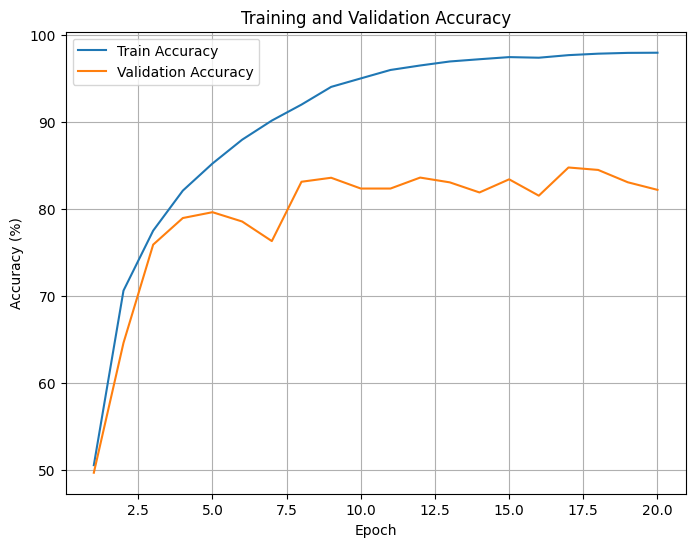

In [17]:
print("Plotting Accuracies...")
plot_accuracies(train_accuracies, val_accuracies)

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim


In [48]:
# 数据预处理（ResNet 标准化 + 数据增强）
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),  # 随机裁剪并调整大小
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),      # 随机旋转
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet 标准化
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [49]:
# CIFAR-10 数据集
cifar10_dataset_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
cifar10_dataset_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_test)
train_loader = DataLoader(cifar10_dataset_train, batch_size=128, shuffle=True)
test_loader = DataLoader(cifar10_dataset_test, batch_size=128, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [50]:
# 训练模型
def train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=10):
    model.train()
    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")

        # 每个 epoch 进行验证
        val_accuracy = test_model(model, test_loader, device, verbose=False)
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy: {val_accuracy:.2f}%")
        model.train()

    return train_accuracies, val_accuracies

In [51]:
# 测试模型
def test_model(model, test_loader, device, verbose=True):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    accuracy = 100. * correct / total
    if verbose:
        print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [52]:
# 可视化训练和验证精度
def plot_accuracies(train_accuracies, val_accuracies):
    epochs = range(1, len(train_accuracies) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid()
    plt.show()

In [53]:
# 主程序
device = torch.device("cuda")
model = models.resnet18(pretrained=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay = 1e-5)

In [54]:
print("Training Model...")
train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=20)

Training Model...
Epoch 1/20, Loss: 1.1832, Train Accuracy: 60.04%
Validation Accuracy: 74.91%
Epoch 2/20, Loss: 0.8202, Train Accuracy: 71.09%
Validation Accuracy: 80.36%
Epoch 3/20, Loss: 0.7318, Train Accuracy: 74.53%
Validation Accuracy: 83.43%
Epoch 4/20, Loss: 0.6741, Train Accuracy: 76.64%
Validation Accuracy: 87.02%
Epoch 5/20, Loss: 0.6340, Train Accuracy: 77.90%
Validation Accuracy: 87.21%
Epoch 6/20, Loss: 0.6039, Train Accuracy: 79.03%
Validation Accuracy: 87.73%
Epoch 7/20, Loss: 0.5777, Train Accuracy: 79.94%
Validation Accuracy: 89.52%
Epoch 8/20, Loss: 0.5596, Train Accuracy: 80.75%
Validation Accuracy: 88.81%
Epoch 9/20, Loss: 0.5436, Train Accuracy: 81.28%
Validation Accuracy: 88.37%
Epoch 10/20, Loss: 0.5247, Train Accuracy: 81.64%
Validation Accuracy: 89.41%
Epoch 11/20, Loss: 0.5195, Train Accuracy: 81.97%
Validation Accuracy: 90.08%
Epoch 12/20, Loss: 0.5021, Train Accuracy: 82.64%
Validation Accuracy: 90.79%
Epoch 13/20, Loss: 0.4842, Train Accuracy: 83.25%
Valid

Plotting Accuracies...


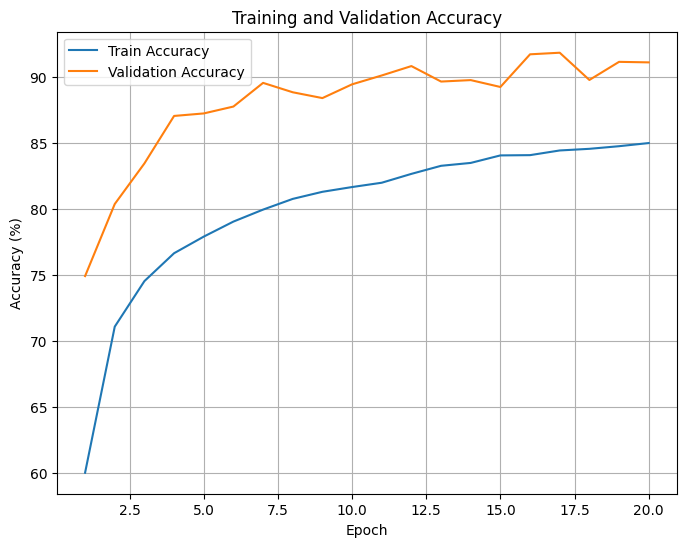

In [55]:
print("Plotting Accuracies...")
plot_accuracies(train_accuracies, val_accuracies)

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim


In [75]:
# 数据预处理（ResNet 标准化 + 数据增强）
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),  # 随机裁剪并调整大小
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    transforms.RandomRotation(10),      # 随机旋转
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet 标准化
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [76]:
# CIFAR-10 数据集
cifar10_dataset_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
cifar10_dataset_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_test)
train_loader = DataLoader(cifar10_dataset_train, batch_size=128, shuffle=True)
test_loader = DataLoader(cifar10_dataset_test, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [77]:
# 训练模型
def train_model(model, train_loader, test_loader, criterion, optimizer,scheduler,device, num_epochs=10):
    model.train()
    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
        train_accuracy = 100. * correct / total
        train_accuracies.append(train_accuracy)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%")
        scheduler.step()
        # 每个 epoch 进行验证
        val_accuracy = test_model(model, test_loader, device, verbose=False)
        val_accuracies.append(val_accuracy)
        print(f"Validation Accuracy: {val_accuracy:.2f}%")
        model.train()

    return train_accuracies, val_accuracies

In [78]:
# 测试模型
def test_model(model, test_loader, device, verbose=True):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    accuracy = 100. * correct / total
    if verbose:
        print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [79]:
# 可视化训练和验证精度
def plot_accuracies(train_accuracies, val_accuracies):
    epochs = range(1, len(train_accuracies) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid()
    plt.show()

In [80]:
# 主程序
device = torch.device("cuda")
model = models.resnet18(pretrained=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay = 1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [81]:
print("Training Model...")
train_accuracies, val_accuracies = train_model(model, train_loader, test_loader, criterion, optimizer,scheduler,device, num_epochs=20)

Training Model...
Epoch 1/20, Loss: 1.1523, Train Accuracy: 60.97%
Validation Accuracy: 80.81%
Epoch 2/20, Loss: 0.8126, Train Accuracy: 71.59%
Validation Accuracy: 80.08%
Epoch 3/20, Loss: 0.7357, Train Accuracy: 74.18%
Validation Accuracy: 85.27%
Epoch 4/20, Loss: 0.6624, Train Accuracy: 77.05%
Validation Accuracy: 86.13%
Epoch 5/20, Loss: 0.6359, Train Accuracy: 78.14%
Validation Accuracy: 88.43%
Epoch 6/20, Loss: 0.5979, Train Accuracy: 79.37%
Validation Accuracy: 85.46%
Epoch 7/20, Loss: 0.5781, Train Accuracy: 79.94%
Validation Accuracy: 90.04%
Epoch 8/20, Loss: 0.5569, Train Accuracy: 80.78%
Validation Accuracy: 87.72%
Epoch 9/20, Loss: 0.5477, Train Accuracy: 80.90%
Validation Accuracy: 89.66%
Epoch 10/20, Loss: 0.5301, Train Accuracy: 81.55%
Validation Accuracy: 90.71%
Epoch 11/20, Loss: 0.4103, Train Accuracy: 85.80%
Validation Accuracy: 93.34%
Epoch 12/20, Loss: 0.3749, Train Accuracy: 87.01%
Validation Accuracy: 93.62%
Epoch 13/20, Loss: 0.3463, Train Accuracy: 87.97%
Valid

Plotting Accuracies...


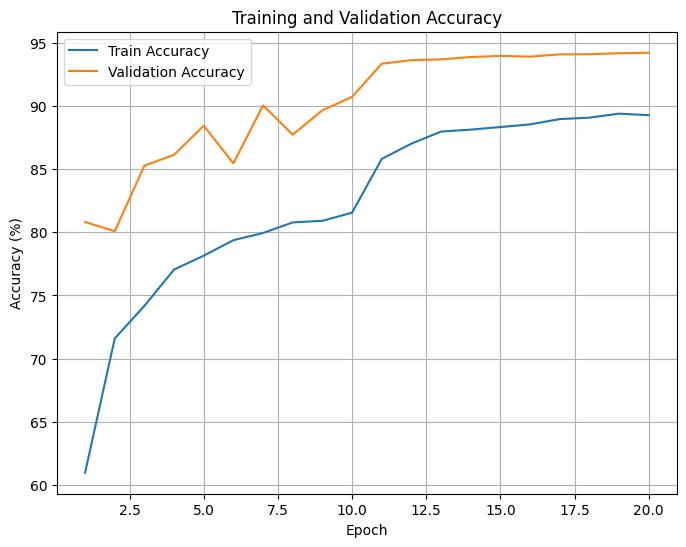

In [82]:
print("Plotting Accuracies...")
plot_accuracies(train_accuracies, val_accuracies)

Files already downloaded and verified
Visualizing Features for Image 0, Label: cat


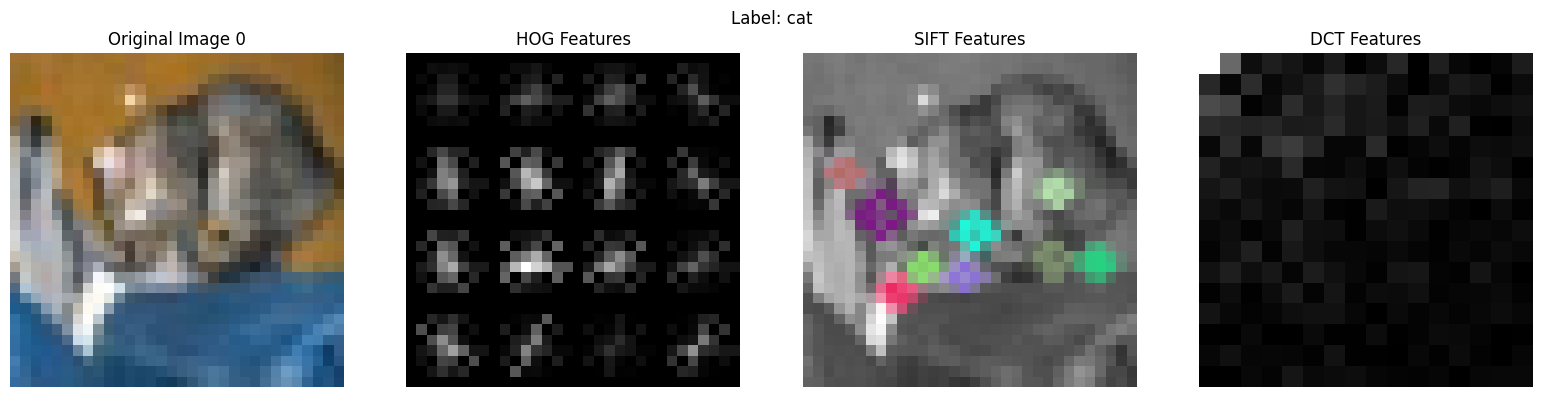

Visualizing Features for Image 1, Label: ship


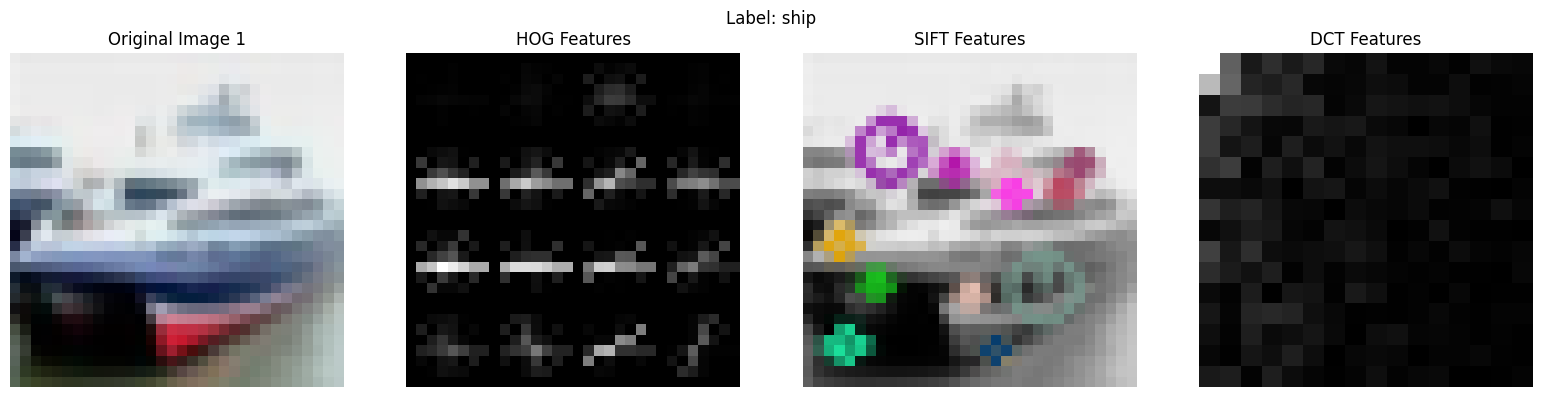

Visualizing Features for Image 2, Label: ship


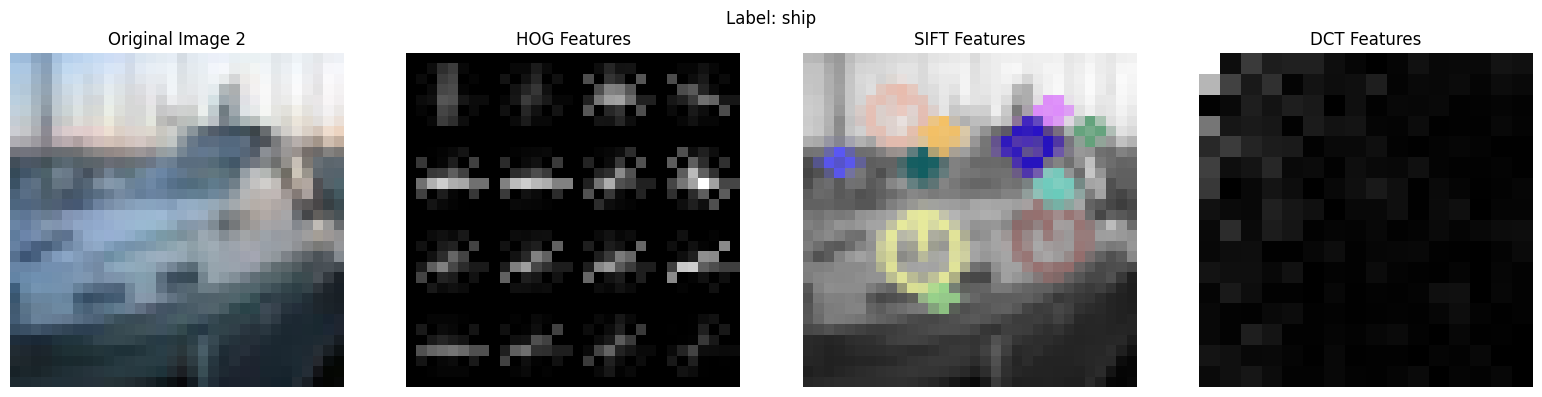

Visualizing Features for Image 3, Label: airplane


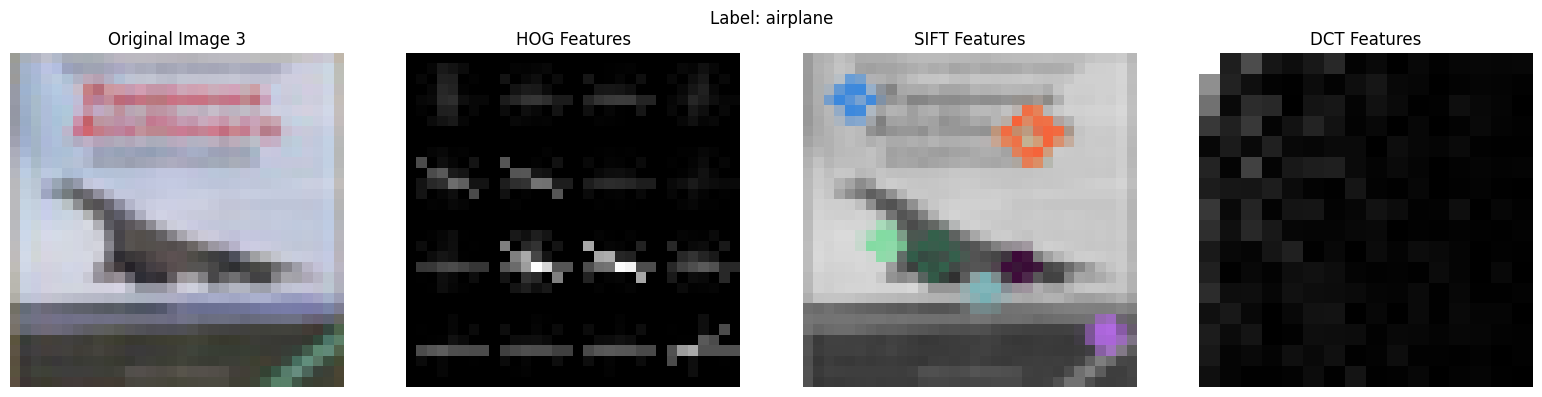

Visualizing Features for Image 4, Label: frog


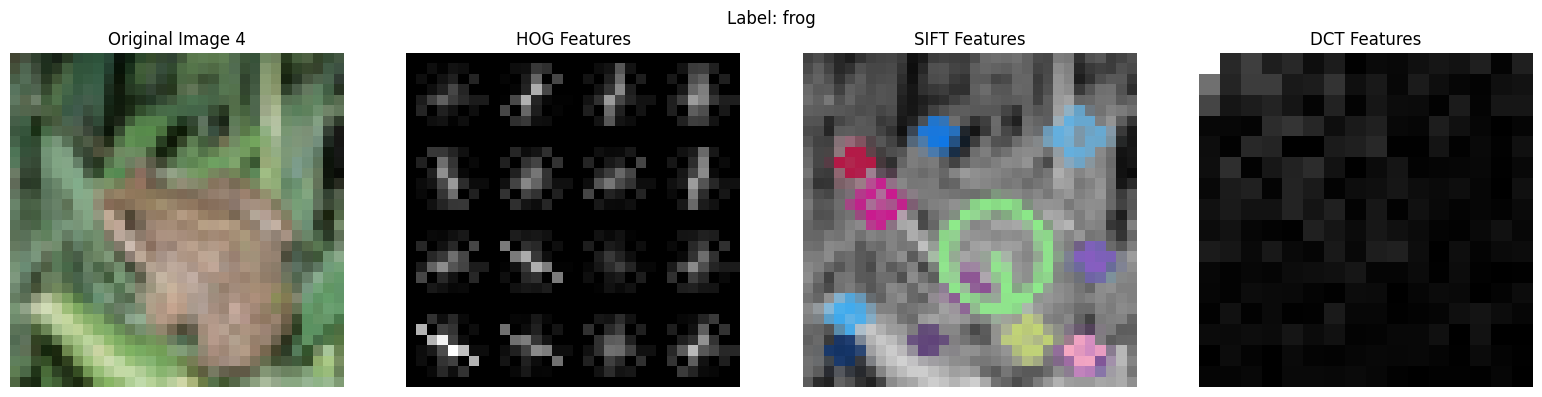

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from skimage.feature import hog

# 数据预处理
transform = transforms.Compose([transforms.ToTensor()])
cifar10_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
data_loader = DataLoader(cifar10_dataset, batch_size=5, shuffle=False)

# HOG 特征提取
def extract_hog(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    _, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return hog_image

# SIFT 特征提取
def extract_sift(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(img_gray, None)
    img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_sift

# DCT 特征提取
def extract_dct(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    dct = cv2.dct(np.float32(img_gray) / 255.0)  # 计算 DCT
    dct_low_freq = dct[:16, :16]  # 提取低频分量
    return np.log(abs(dct_low_freq) + 1)  # 取对数增强对比度

# 可视化多特征提取结果
def visualize_features(img, index, label):
    hog_image = extract_hog(img)
    sift_image = extract_sift(img)
    dct_image = extract_dct(img)

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 创建一行四列的子图
    axes[0].imshow(img)
    axes[0].set_title(f"Original Image {index}")
    axes[0].axis('off')

    axes[1].imshow(hog_image, cmap='gray')
    axes[1].set_title("HOG Features")
    axes[1].axis('off')

    axes[2].imshow(sift_image, cmap='gray')
    axes[2].set_title("SIFT Features")
    axes[2].axis('off')

    axes[3].imshow(dct_image, cmap='gray')
    axes[3].set_title("DCT Features")
    axes[3].axis('off')

    fig.suptitle(f"Label: {label}")
    plt.tight_layout()
    plt.show()

# 主程序
for idx, (img, label) in enumerate(data_loader):
    if idx == 0:  # 只处理第一个批次
        images = img.permute(0, 2, 3, 1).numpy()  # 转为 NumPy 格式 (N, H, W, C)
        for i in range(5):  # 对前 5 张图像进行特征提取
            print(f"Visualizing Features for Image {i}, Label: {cifar10_dataset.classes[label[i]]}")
            visualize_features((images[i] * 255).astype(np.uint8), i, cifar10_dataset.classes[label[i]])
        break


Files already downloaded and verified
Visualizing Features for Image 0, Label: cat


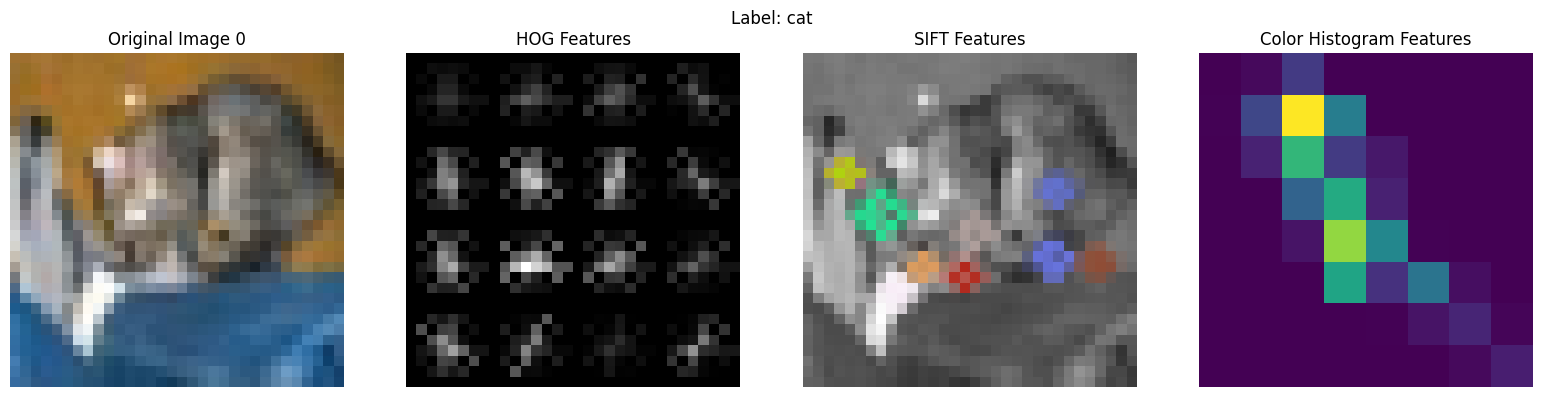

Visualizing Features for Image 1, Label: ship


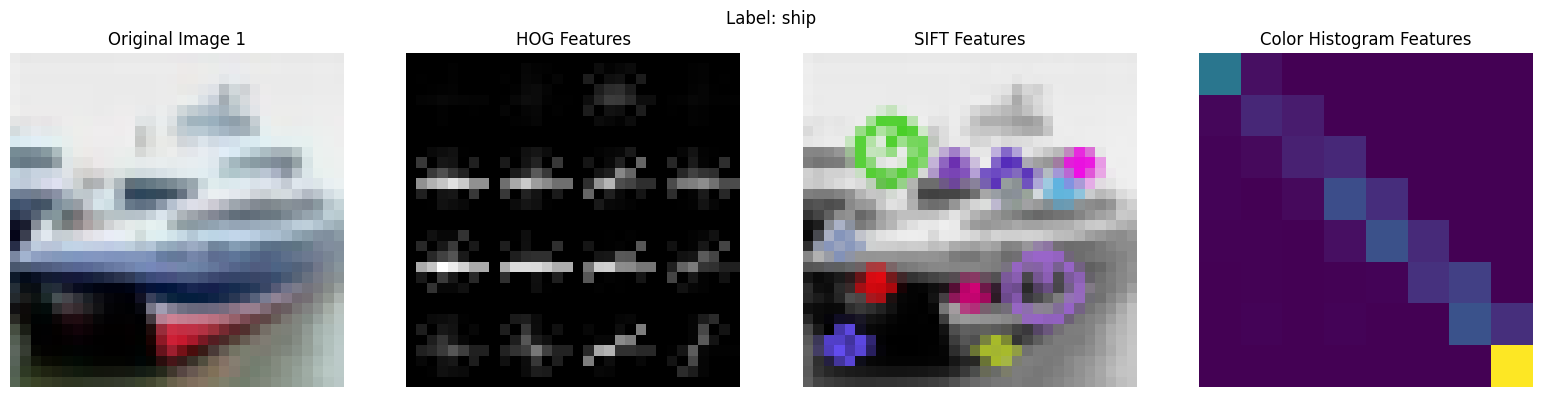

Visualizing Features for Image 2, Label: ship


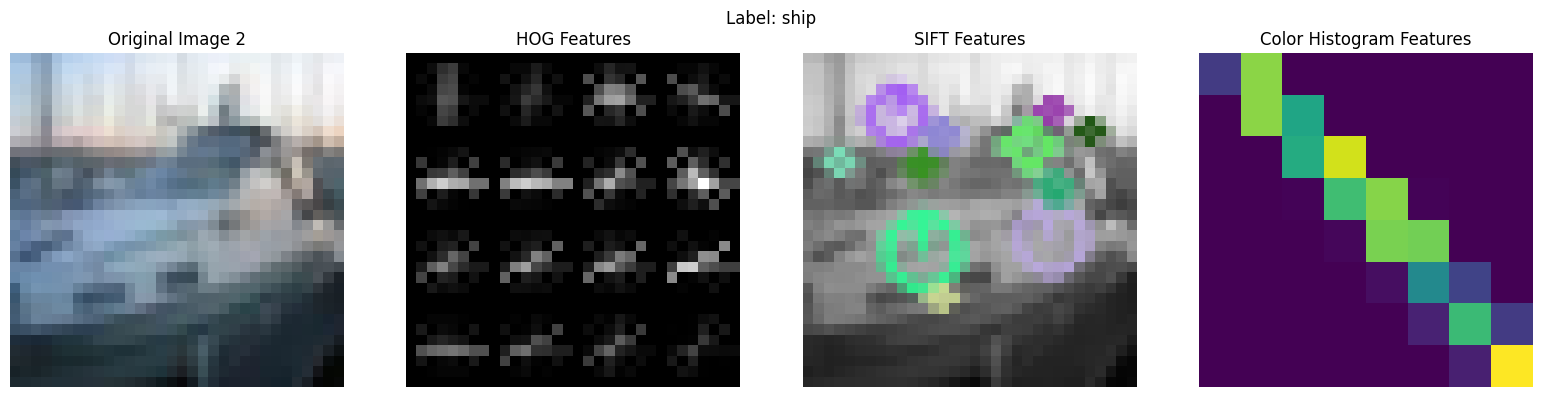

Visualizing Features for Image 3, Label: airplane


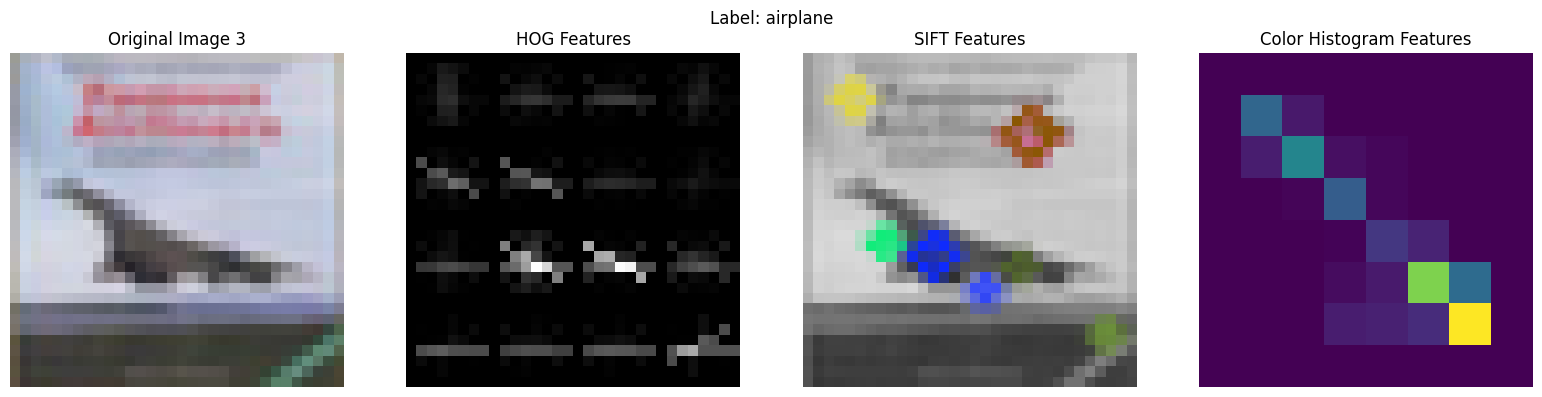

Visualizing Features for Image 4, Label: frog


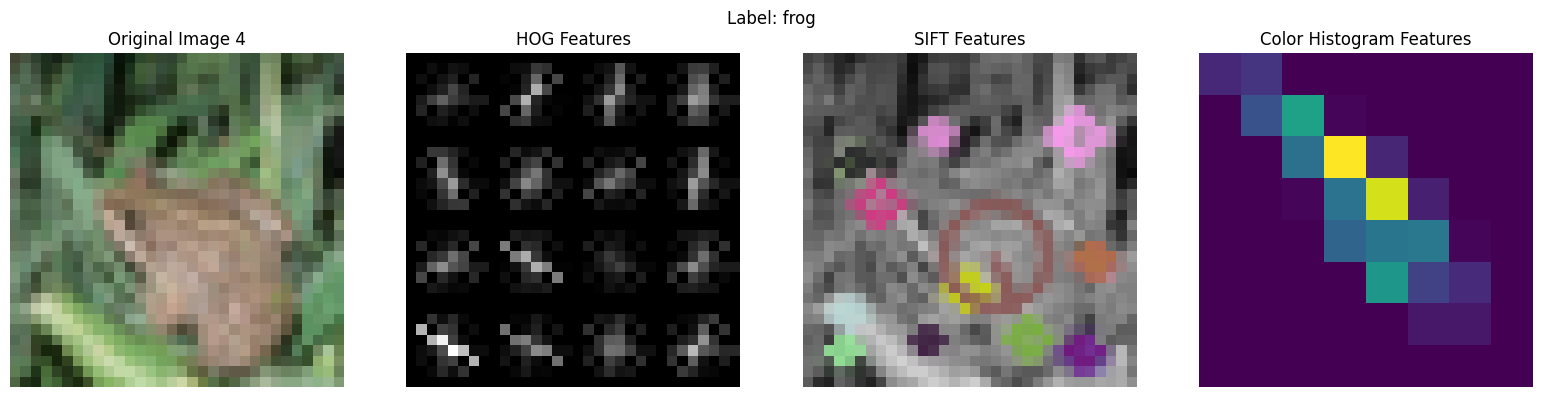

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from skimage.feature import hog

# 数据预处理
transform = transforms.Compose([transforms.ToTensor()])
cifar10_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
data_loader = DataLoader(cifar10_dataset, batch_size=5, shuffle=False)

# HOG 特征提取
def extract_hog(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    _, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=None)
    return hog_image

# SIFT 特征提取
def extract_sift(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # 转灰度图像
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(img_gray, None)
    img_sift = cv2.drawKeypoints(img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_sift

# 颜色直方图特征提取
def extract_color_histogram(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])  # 计算 3D 颜色直方图
    hist = cv2.normalize(hist, hist).flatten()  # 归一化并展开为一维数组
    hist_image = hist.reshape(8, 8, 8).mean(axis=-1)  # 可视化为 2D 格式
    return hist_image

# 可视化多特征提取结果
def visualize_features(img, index, label):
    hog_image = extract_hog(img)
    sift_image = extract_sift(img)
    color_hist_image = extract_color_histogram(img)

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 创建一行四列的子图
    axes[0].imshow(img)
    axes[0].set_title(f"Original Image {index}")
    axes[0].axis('off')

    axes[1].imshow(hog_image, cmap='gray')
    axes[1].set_title("HOG Features")
    axes[1].axis('off')

    axes[2].imshow(sift_image, cmap='gray')
    axes[2].set_title("SIFT Features")
    axes[2].axis('off')

    axes[3].imshow(color_hist_image, cmap='viridis')
    axes[3].set_title("Color Histogram Features")
    axes[3].axis('off')

    fig.suptitle(f"Label: {label}")
    plt.tight_layout()
    plt.show()

# 主程序
for idx, (img, label) in enumerate(data_loader):
    if idx == 0:  # 只处理第一个批次
        images = img.permute(0, 2, 3, 1).numpy()  # 转为 NumPy 格式 (N, H, W, C)
        for i in range(5):  # 对前 5 张图像进行特征提取
            print(f"Visualizing Features for Image {i}, Label: {cifar10_dataset.classes[label[i]]}")
            visualize_features((images[i] * 255).astype(np.uint8), i, cifar10_dataset.classes[label[i]])
        break
